In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
!pip install tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files

# Upload the XLSX file
uploaded = files.upload()


Saving bangla_online_comments_dataset.xlsx to bangla_online_comments_dataset.xlsx


In [ ]:
import pandas as pd

# Convert XLSX to CSV
xlsx_filename = "bangla_online_comments_dataset.xlsx"
csv_filename = xlsx_filename.replace(".xlsx", ".csv")
df = pd.read_excel(xlsx_filename)
df.to_csv(csv_filename, index=False)


In [ ]:
df = pd.read_csv(csv_filename)

# Rename columns
df.rename(columns={'A1': 'comment', 'B1': 'Category', 'C1': 'Gender', 'D1': 'comment react number', 'E1': 'label'}, inplace=True)



In [ ]:
data = pd.read_csv('bangla_online_comments_dataset.csv',encoding='UTF-8')

data.head(10)

,comment,Category,Gender,comment react number,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully
4,পটকা মাছ,Politician,Male,0.0,troll
5,অন্যরকম .. ভালো লাগলো ..❤️,Singer,Male,1.0,not bully
6,সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...,Actor,Female,9.0,troll
7,মোহাম্মদ কফিল উদ্দীন মাহমুদRidwan RomelDwaipay...,Actor,Female,0.0,not bully
8,ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...,Actor,Female,4.0,religious
9,"হিরো আলম তুমি এগিয়ে চলো, আমরা আছি তোমার সাথে।",Social,Male,0.0,not bully


In [ ]:
data.shape


(44001, 5)

In [ ]:
data.columns


Index(['comment', 'Category', 'Gender', 'comment react number', 'label'], dtype='object')

In [ ]:
print("Total Comments:",len(data),
      "\nTotal Sexual Comment:",len(data[data.label =='sexual']),
      "\nTotal not bully Comment:",len(data[data.label=='not bully']),
      "\nTotal troll Comment:",len(data[data.label =='troll']),
      "\nTotal religious Comment:",len(data[data.label =='religious']),
      "\nTotal threat Comment:",len(data[data.label =='threat']),
      )


Total Comments: 44001 
Total Sexual Comment: 8928 
Total not bully Comment: 15340 
Total troll Comment: 10462 
Total religious Comment: 7577 
Total threat Comment: 1694


In [ ]:
# print some unprocessed reviews
sample_data = [10,100,150,200,250,600,650,666,689,640,650,700,750,800,1000]
for i in sample_data:
      print(data.comment[i],'\n','Sentiment:-- ',data.label[i],'\n')

খানকিরা এইটা জানলে,তুই খানকি বিত্তি কিভাবে করতি???আর আল্লাহতায়ালা জাহান্নাম কিসের জন্য বানাইছে??তোদের মতো খানকি+নাস্তিকদের জন্যই... 
 Sentiment:--  religious 

কোনটা ছেড়ে কোনটা রাখি...।  অসাধারণ ........অসাধারণ ..............।।তিশার তুলনা আমার কাছে শুধুই তিশা...............। 
 Sentiment:--  not bully 

আমার বাবা বীর মুক্তিযোদ্ধা মোঃ আবুল কাসেম এর পক্ষ থেকে মহান বিজয় দিবসের শুভেচ্ছা ও অভিনন্দন ।স্বাধীনতার জন্য বঙ্গবন্ধু শেখ মুজিবুর রহমানের দীর্ঘ ত্যাগী সংগ্রাম একাত্তরে খুঁজে পায় কাংখিত ঠিকানা। কী করে বাঙ্গালির স্বাধীনতার ঠিকানা, মুক্তির প্রতীক হয়ে উঠেছিলেন বঙ্গবন্ধু?সৌজন্যে বৈশাখী টিভি চ্যানেল।সাক্ষাতকার গ্রহণে কাজী বাপ্পা।https://m.facebook.com/story.php?story_fbid=1393456854161132&id=322595671837057https://youtu.be/cgLgYPJ7-V0 
 Sentiment:--  not bully 

আপনি অভিনয় করেন, তাই ফ্যান বাচাতে এগুলা বলছেন এখন। মুখ দিয়া সত্যিটা বলে ফেসে গেছেন, তাই এই কবিতার লাইনটা কারো কাছ থেকে ভাড়া করে আনছেন। আপনি একজন নাস্তিক, এটাই চরম সত্য!!  #unfollowsafakabir. 
 Sentiment:--  religious 

আপনে বোন একটা

In [ ]:
import re
def process_comments(comment):
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment)) #removing unnecessary punctuation
    return comment

In [ ]:

data['cleaned'] = data['comment'].apply(process_comments)


sample_data = [10,100,25,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.label[i],'\n')

Original:
 খানকিরা এইটা জানলে,তুই খানকি বিত্তি কিভাবে করতি???আর আল্লাহতায়ালা জাহান্নাম কিসের জন্য বানাইছে??তোদের মতো খানকি+নাস্তিকদের জন্যই... 
Cleaned:
 খানকিরা এইটা জানলে তুই খানকি বিত্তি কিভাবে করতি   আর আল্লাহতায়ালা জাহান্নাম কিসের জন্য বানাইছে  তোদের মতো খানকি নাস্তিকদের জন্যই    
 Sentiment:--  religious 

Original:
 কোনটা ছেড়ে কোনটা রাখি...।  অসাধারণ ........অসাধারণ ..............।।তিশার তুলনা আমার কাছে শুধুই তিশা...............। 
Cleaned:
 কোনটা ছেড়ে কোনটা রাখি      অসাধারণ         অসাধারণ                 তিশার তুলনা আমার কাছে শুধুই তিশা                 
 Sentiment:--  not bully 

Original:
 অবশ্যই ছোট & ছেলে মেয়েকে ইসলামের শিক্ষা বাদ্যতামুলক@আফসার ভাইকে ধন্যবাদ 
Cleaned:
 অবশ্যই ছোট   ছেলে মেয়েকে ইসলামের শিক্ষা বাদ্যতামুলক আফসার ভাইকে ধন্যবাদ 
 Sentiment:--  religious 

Original:
 কমেন্ট পড়তে আসছিলাম, এখন আমি ৭দিন পাগল থাকব 
Cleaned:
 কমেন্ট পড়তে আসছিলাম  এখন আমি ৭দিন পাগল থাকব 
 Sentiment:--  not bully 

Original:
 সৃষ্টির ধারনা স্রষ্টার কাছ থেকেই এসেছে যা শুধু তার সৃষ্টির জন

In [ ]:

data['length'] = data['cleaned'].apply(lambda x:len(x.split()))

dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small comments".format(len(data)-len(dataset)),
      "\nTotal comments:",len(dataset))

In [ ]:
import numpy as np
def data_summary(dataset):

    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.label.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.label==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.label==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#calling the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  not bully
Number of Documents:14550
Number of Words:186637
Number of Unique Words:23054
Most Frequent Words:

না	2785
আল্লাহ	1865
করে	1806
ভাই	1733
আপনার	1479
হিরো	1436
আলম	1375
কি	1292
এই	1268
আর	1251

Class Name :  troll
Number of Documents:10212
Number of Words:153113
Number of Unique Words:21480
Most Frequent Words:

না	3265
কি	1798
করে	1634
আর	1345
এই	1301
হিরো	1031
তো	1016
তুই	909
কে	902
বিশ্বাস	881

Class Name :  sexual
Number of Documents:8775
Number of Words:176083
Number of Unique Words:22747
Most Frequent Words:

না	3673
করে	1879
কি	1678
মাগি	1489
আর	1408
বিশ্বাস	1343
তুই	1333
এই	1198
আমি	1142
তোর	1130

Class Name :  religious
Number of Documents:7531
Number of Words:199631
Number of Unique Words:20375
Most Frequent Words:

নাস্তিক	5289
না	4965
করে	2615
বিশ্বাস	2262
কি	1994
আর	1958
তুই	1720
আল্লাহ	1638
এই	1567
যে	1497

Class Name :  threat
Number of Documents:1686
Number of Words:29082
Number of Unique Words:6422
Most Frequent Words:

জুতা	761
না	501
করে	346
এ

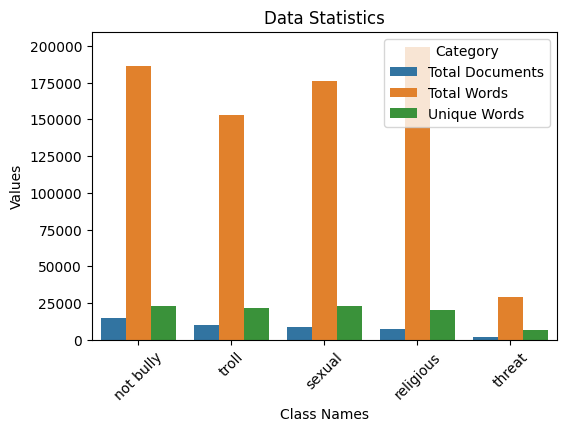

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

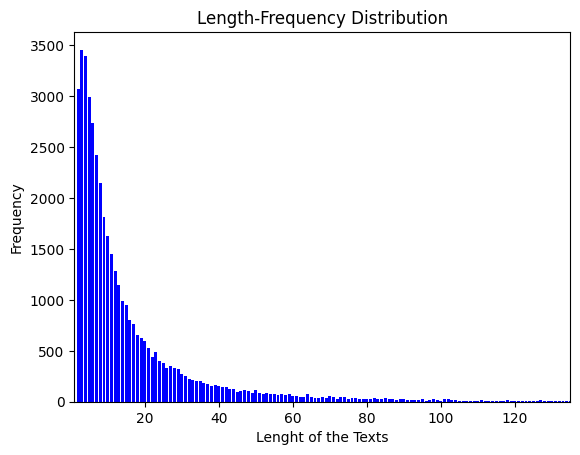

Maximum Length of a comment: 241
Minimum Length of a comment: 2
Average Length of a comment: 17.0


In [ ]:

# Calculate the label of each of the Comment
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a comment: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a comment: {min(dataset.ReviewLength)}")
print(f"Average Length of a comment: {round(np.mean(dataset.ReviewLength),0)}")

In [ ]:
sexual = dataset[dataset.label== 'sexual']
not_bully = dataset[dataset.label== 'not bully']
troll = dataset[dataset.label== 'troll']
religious = dataset[dataset.label== 'religious']
threat = dataset[dataset.label == 'threat']

dataset.label.value_counts()

not bully    14550
troll        10212
sexual        8775
religious     7531
threat        1686
Name: label, dtype: int64

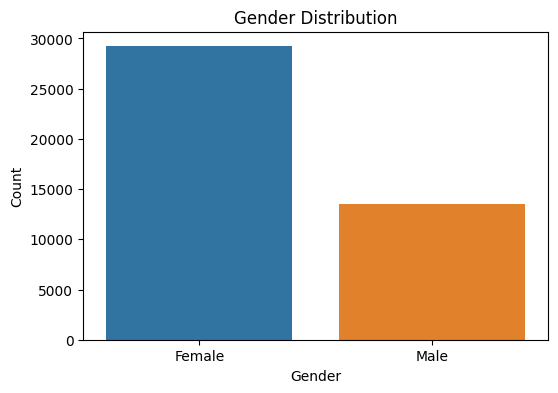

In [ ]:
# Count the occurrences of each gender
gender_counts = dataset['Gender'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


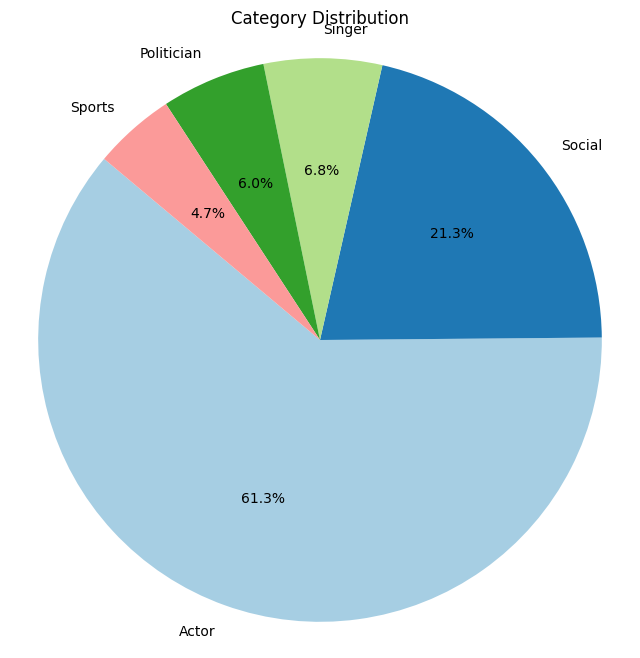

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = data['Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Category Distribution')
plt.show()


Vectorization of the preprocessed data using the TF-IDF vectorizer:

In [ ]:
#Label Encoding Function


def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format.

    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)

    Returns:
        labels: numpy array
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels



# Dataset Splitting Function

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector .

    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array)

    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test

In [ ]:

dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

In [ ]:

##### Unigram Tf-idf value calculation


def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features .

    Args:
        reviews: a list of cleaned reviews

    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(reviews)

    return tfidf,X


In [ ]:
def run_model(m, n):
    gram_names = ['Unigram', 'Bigram', 'Trigram']
    ngrams = [(1, 1), (1, 2), (1, 3)]
    counter = 0
    accuracy_scores = []

    for i, gram in enumerate(ngrams):
        print('For:', gram_names[counter])
        counter += 1
        tfidf, feature = calc_gram_tfidf(dataset.cleaned, gram)
        labels = label_encoding(dataset.label, False)
        X_train, X_test, y_train, y_test = dataset_split(feature, labels)
        model = m
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        print("Classification Report:", n)
        print(classification_report(y_test, y_pred))
        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()

    return accuracy_scores


AI Model:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
def run_model(m,n):
## save the performance of the model for each gram feature
  gram_names = ['Unigram','Bigram','Trigram']
  ngrams = [(1,1),(1,2),(1,3)]
  counter = 0
  for i,gram in enumerate(ngrams):
      print('For:',gram_names[counter])
      counter+=1
      tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
      labels = label_encoding(dataset.label,False)
      X_train,X_test,y_train,y_test = dataset_split(feature,labels)
      model = m
      model.fit(X_train,y_train)
      y_pred = model.predict(X_test)
      print("Classification Report:",n)
      print(classification_report(y_test, y_pred))
      conf_matrix = confusion_matrix(y_test, y_pred)
      sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
      plt.xlabel('Predicted Labels')
      plt.ylabel('True Labels')
      plt.title('Confusion Matrix')
      plt.show()

Multinomial Naive Bayes:

For: Unigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 55625

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.70      0.91      0.79      1432
           1       0.74      0.79      0.76       782
           2       0.82      0.59      0.69       889
           3       0.90      0.10      0.18       176
           4       0.69      0.63      0.66       997

    accuracy                           0.72      4276
   macro avg       0.77      0.60      0.62      4276
weighted avg       0.74      0.72      0.71      4276



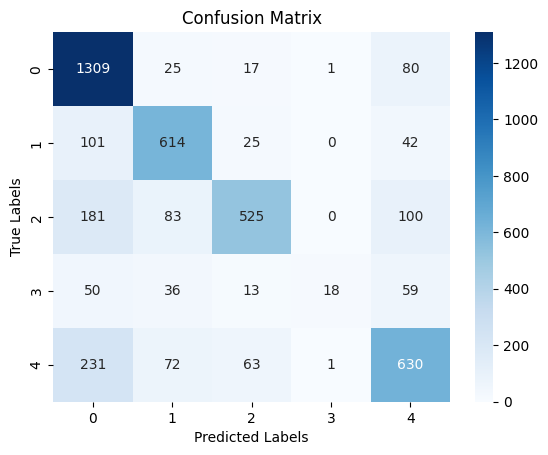

For: Bigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 415876

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.64      0.95      0.76      1432
           1       0.77      0.75      0.76       782
           2       0.84      0.51      0.64       889
           3       0.90      0.10      0.18       176
           4       0.73      0.58      0.65       997

    accuracy                           0.70      4276
   macro avg       0.77      0.58      0.60      4276
weighted avg       0.73      0.70      0.69      4276



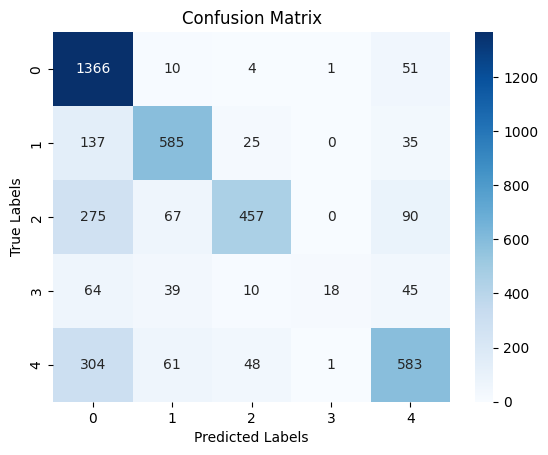

For: Trigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 951929

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.58      0.97      0.73      1432
           1       0.81      0.68      0.74       782
           2       0.84      0.46      0.59       889
           3       0.94      0.10      0.18       176
           4       0.72      0.54      0.62       997

    accuracy                           0.67      4276
   macro avg       0.78      0.55      0.57      4276
weighted avg       0.73      0.67      0.65      4276



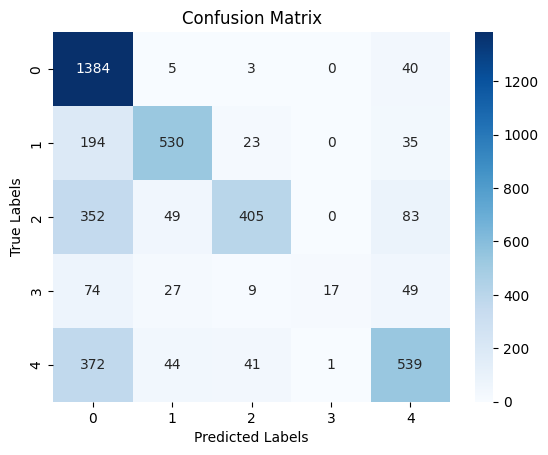

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
name = 'Multinomial Naive Bayes'
run_model(model,name)

Logistic Regression:


For: Unigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 55625

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1432
           1       0.92      0.81      0.86       782
           2       0.85      0.73      0.78       889
           3       0.91      0.49      0.64       176
           4       0.72      0.74      0.73       997

    accuracy                           0.80      4276
   macro avg       0.83      0.73      0.77      4276
weighted avg       0.81      0.80      0.79      4276



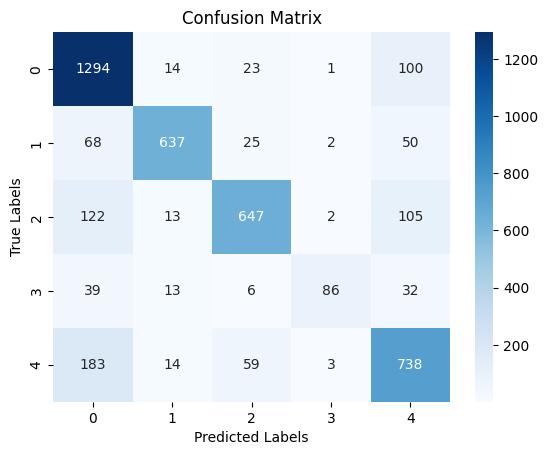

For: Bigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 415876

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.91      0.81      1432
           1       0.91      0.80      0.85       782
           2       0.86      0.69      0.76       889
           3       0.92      0.41      0.57       176
           4       0.71      0.73      0.72       997

    accuracy                           0.78      4276
   macro avg       0.83      0.71      0.74      4276
weighted avg       0.79      0.78      0.78      4276



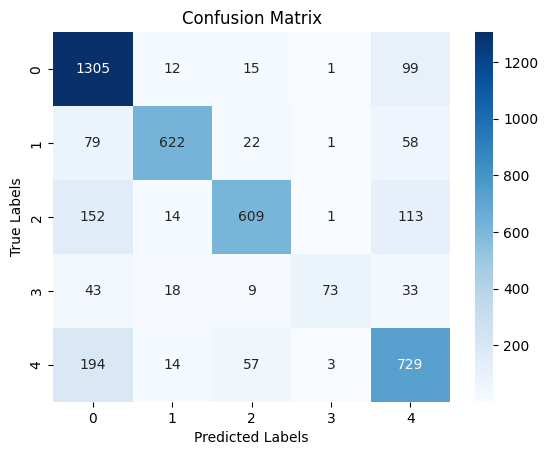

For: Trigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 951929

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.91      0.80      1432
           1       0.90      0.78      0.84       782
           2       0.85      0.65      0.74       889
           3       0.94      0.36      0.52       176
           4       0.69      0.71      0.70       997

    accuracy                           0.76      4276
   macro avg       0.82      0.68      0.72      4276
weighted avg       0.78      0.76      0.76      4276



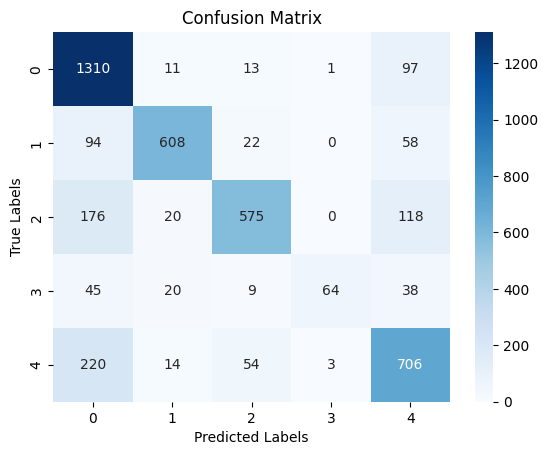

In [ ]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
name = 'Logistic Regression'
run_model(model,name)

Random Forest Classifier:

For: Unigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 55625

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      1432
           1       0.86      0.83      0.84       782
           2       0.84      0.64      0.73       889
           3       0.87      0.51      0.65       176
           4       0.70      0.67      0.68       997

    accuracy                           0.77      4276
   macro avg       0.80      0.71      0.74      4276
weighted avg       0.78      0.77      0.76      4276



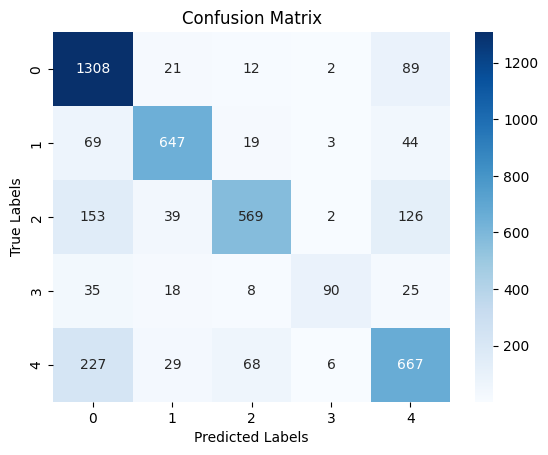

For: Bigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 415876

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.70      0.93      0.80      1432
           1       0.86      0.82      0.84       782
           2       0.85      0.61      0.71       889
           3       0.90      0.49      0.63       176
           4       0.72      0.65      0.68       997

    accuracy                           0.76      4276
   macro avg       0.81      0.70      0.73      4276
weighted avg       0.78      0.76      0.76      4276



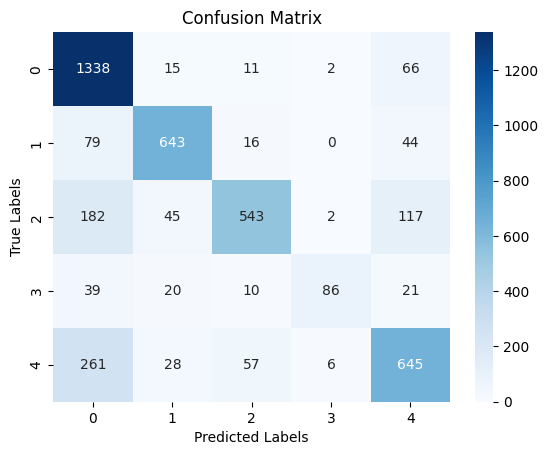

For: Trigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 951929

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.69      0.93      0.79      1432
           1       0.83      0.81      0.82       782
           2       0.87      0.60      0.71       889
           3       0.90      0.46      0.61       176
           4       0.72      0.65      0.68       997

    accuracy                           0.75      4276
   macro avg       0.80      0.69      0.72      4276
weighted avg       0.77      0.75      0.75      4276



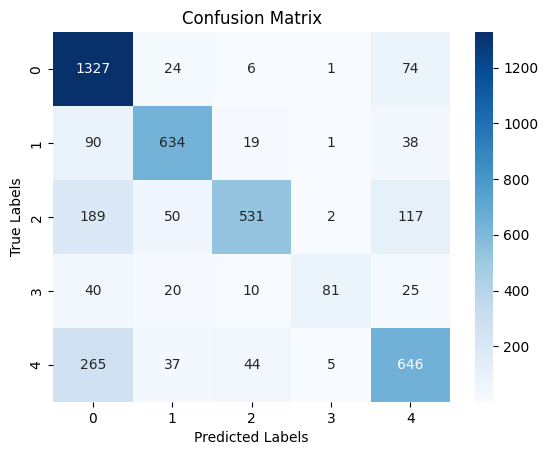

In [ ]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
name = 'Random Forest'
run_model(model,name)

Support Vector Machine (SVM) Classifier:

For: Unigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 55625

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1432
           1       0.92      0.82      0.87       782
           2       0.86      0.74      0.79       889
           3       0.90      0.59      0.71       176
           4       0.73      0.74      0.74       997

    accuracy                           0.80      4276
   macro avg       0.83      0.76      0.79      4276
weighted avg       0.81      0.80      0.80      4276



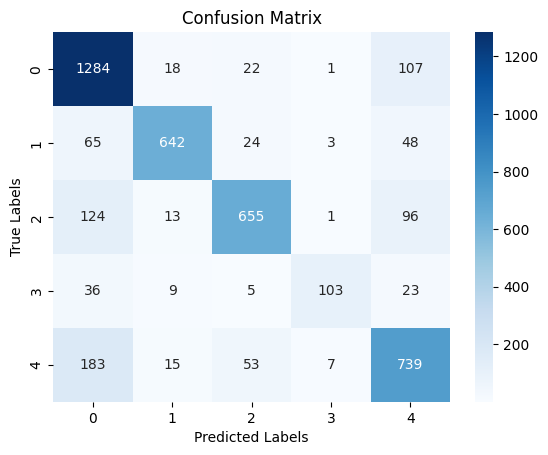

For: Bigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 415876

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.76      0.91      0.82      1432
           1       0.93      0.81      0.87       782
           2       0.85      0.71      0.78       889
           3       0.91      0.57      0.70       176
           4       0.72      0.74      0.73       997

    accuracy                           0.80      4276
   macro avg       0.83      0.75      0.78      4276
weighted avg       0.81      0.80      0.79      4276



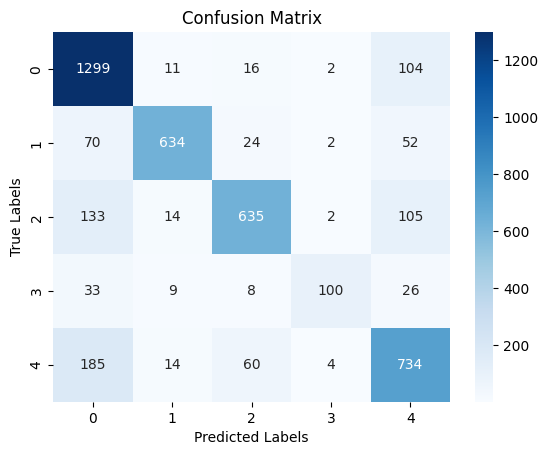

For: Trigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 951929

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1432
           1       0.93      0.80      0.86       782
           2       0.86      0.69      0.76       889
           3       0.91      0.53      0.67       176
           4       0.70      0.73      0.71       997

    accuracy                           0.78      4276
   macro avg       0.83      0.73      0.76      4276
weighted avg       0.80      0.78      0.78      4276



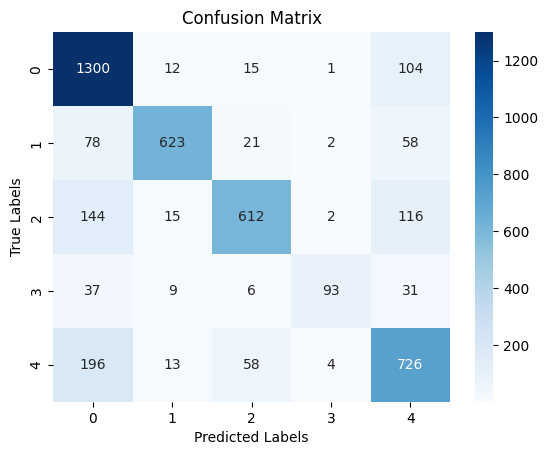

In [ ]:

from sklearn.svm import SVC
model = SVC(kernel='linear')
name = 'Support Vector Machines'
run_model(model,name)

Cat Boost:

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00
For: Unigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 55625

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Learning rate set to 0.5
0:	learn: 1.2328259	total: 3.81s	remaining: 6m 16s
1:	learn: 1.1328483	total: 6.33s	remaining: 5m 10s
2:	learn: 1.0855549	total: 8.76s	remaining: 4m 43s
3:	learn: 1.0330552	total: 11.2s	remaining: 4m 29s
4:	learn: 1.0052115	total: 13.8s	remaining: 4m 22s
5:	learn: 0.9783115	total: 17.4s	remaining: 4m 32s
6:	learn: 0.9592051	total: 19.8s	remaining: 4m 22s
7:	learn: 0.9442729	total: 25.5s	remaining: 4m 52s
8:	learn: 0.9318155	total: 36.5s	remaining: 6m 9s
9:	learn: 0.9157596	total: 39.9s	remaining: 5m 59s
10:	learn: 0.9041713	total: 43.8s	remaining: 5m 54s
11:	learn: 0.8915167	total: 46.3s	remaining: 5m 39s
12:	learn: 0.8808614	total: 48.8s	remaining: 5m 26s
13:	learn: 0.8718459	total: 51.3s	remaining: 5m 15s
14:	learn: 0.8622891	total: 53.8s	remaining: 5m 4s
15:	learn: 0.8546935	total: 57.5s	remaining: 5m 1s
16:	learn: 0.8462530

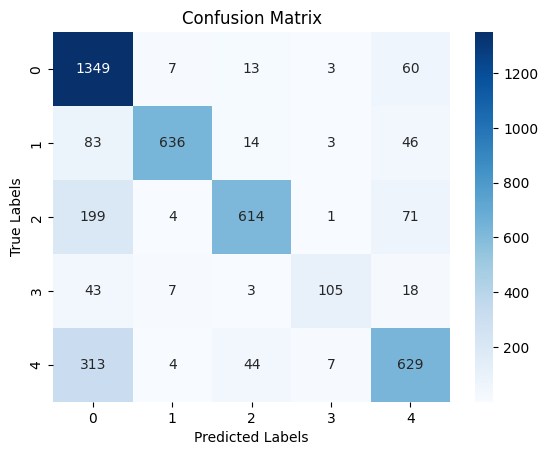

For: Bigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 415876

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Learning rate set to 0.5
0:	learn: 1.2560969	total: 8.96s	remaining: 14m 46s
1:	learn: 1.1563967	total: 15.9s	remaining: 13m
2:	learn: 1.1015175	total: 21.6s	remaining: 11m 38s
3:	learn: 1.0523843	total: 28.6s	remaining: 11m 25s
4:	learn: 1.0170518	total: 34.2s	remaining: 10m 50s
5:	learn: 0.9909151	total: 41.2s	remaining: 10m 45s
6:	learn: 0.9763318	total: 51.2s	remaining: 11m 20s
7:	learn: 0.9607031	total: 57s	remaining: 10m 55s
8:	learn: 0.9429889	total: 1m 3s	remaining: 10m 41s
9:	learn: 0.9257829	total: 1m 9s	remaining: 10m 25s
10:	learn: 0.9152213	total: 1m 15s	remaining: 10m 12s
11:	learn: 0.9017712	total: 1m 21s	remaining: 10m
12:	learn: 0.8920320	total: 1m 27s	remaining: 9m 46s
13:	learn: 0.8754647	total: 1m 34s	remaining: 9m 39s
14:	learn: 0.8663307	total: 1m 40s	remaining: 9m 26s
15:	learn: 0.8578642	total: 1m 46s	remaining: 9m 20s
16:	lear

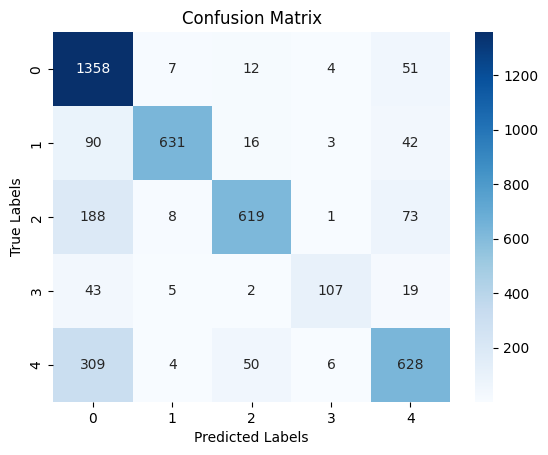

For: Trigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 951929

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Learning rate set to 0.5
0:	learn: 1.2475904	total: 17.3s	remaining: 28m 31s
1:	learn: 1.1475259	total: 28.8s	remaining: 23m 30s
2:	learn: 1.0906587	total: 40.1s	remaining: 21m 37s
3:	learn: 1.0498900	total: 51.3s	remaining: 20m 31s
4:	learn: 1.0205134	total: 1m 2s	remaining: 19m 43s
5:	learn: 0.9905747	total: 1m 12s	remaining: 18m 53s
6:	learn: 0.9684904	total: 1m 23s	remaining: 18m 27s
7:	learn: 0.9543063	total: 1m 34s	remaining: 18m 5s
8:	learn: 0.9379958	total: 1m 45s	remaining: 17m 46s
9:	learn: 0.9240354	total: 1m 56s	remaining: 17m 28s
10:	learn: 0.9114258	total: 2m 7s	remaining: 17m 12s
11:	learn: 0.8970939	total: 2m 17s	remaining: 16m 48s
12:	learn: 0.8868048	total: 2m 28s	remaining: 16m 32s
13:	learn: 0.8761415	total: 2m 39s	remaining: 16m 19s
14:	learn: 0.8654957	total: 2m 50s	remaining: 16m 5s
15:	learn: 0.8567037	total: 3m 1s	remaining: 1

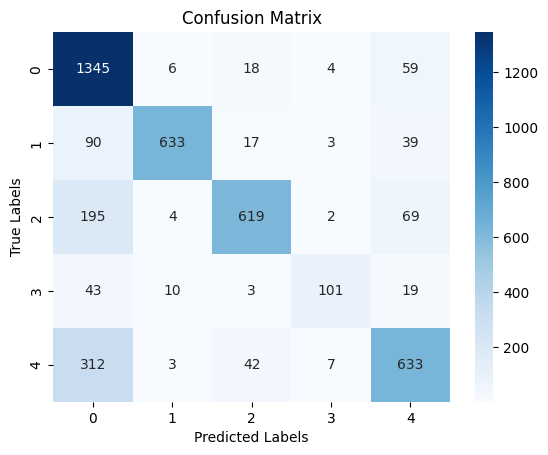

In [ ]:
!pip install catboost

from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, random_seed=42)
name = 'Cat Boost'
run_model(model,name)

XGB Boost:

For: Unigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 55625

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: xg boost
              precision    recall  f1-score   support

           0       0.70      0.95      0.81      1432
           1       0.96      0.84      0.90       782
           2       0.92      0.70      0.79       889
           3       0.87      0.62      0.72       176
           4       0.78      0.67      0.72       997

    accuracy                           0.80      4276
   macro avg       0.85      0.76      0.79      4276
weighted avg       0.82      0.80      0.80      4276



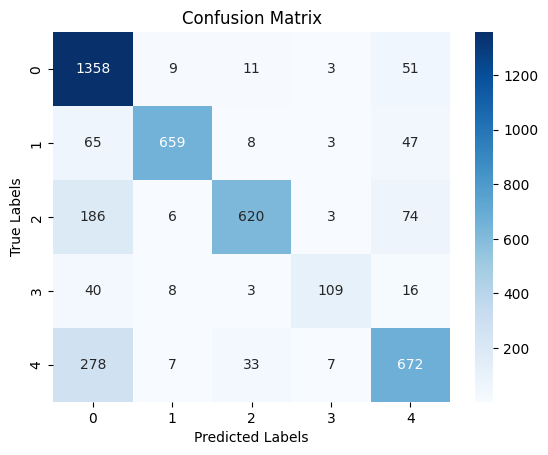

For: Bigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 415876

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: xg boost
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      1432
           1       0.96      0.84      0.89       782
           2       0.92      0.71      0.80       889
           3       0.89      0.62      0.73       176
           4       0.78      0.67      0.72       997

    accuracy                           0.80      4276
   macro avg       0.85      0.76      0.79      4276
weighted avg       0.82      0.80      0.80      4276



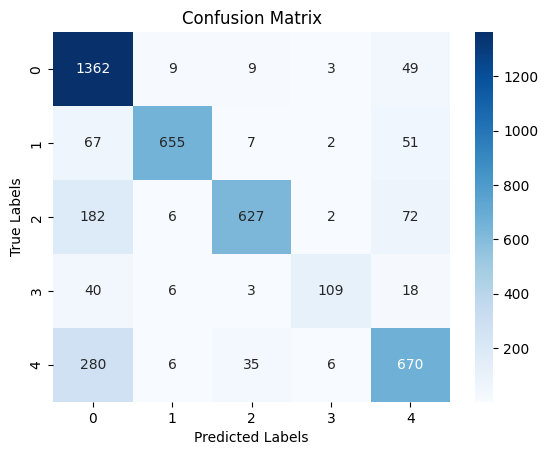

For: Trigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 951929

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: xg boost
              precision    recall  f1-score   support

           0       0.70      0.95      0.81      1432
           1       0.95      0.84      0.89       782
           2       0.92      0.70      0.80       889
           3       0.89      0.61      0.72       176
           4       0.77      0.66      0.71       997

    accuracy                           0.80      4276
   macro avg       0.85      0.75      0.79      4276
weighted avg       0.82      0.80      0.80      4276



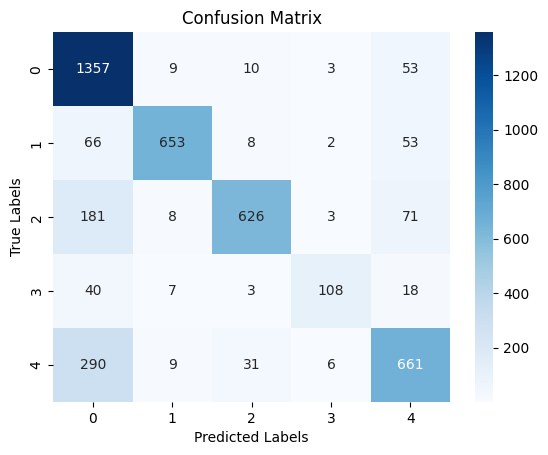

In [ ]:
!pip install xgboost

import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
name = 'xg boost'
run_model(model,name)

Running Multinomial Naive Bayes
For: Unigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 55625

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.70      0.91      0.79      1432
           1       0.74      0.79      0.76       782
           2       0.82      0.59      0.69       889
           3       0.90      0.10      0.18       176
           4       0.69      0.63      0.66       997

    accuracy                           0.72      4276
   macro avg       0.77      0.60      0.62      4276
weighted avg       0.74      0.72      0.71      4276



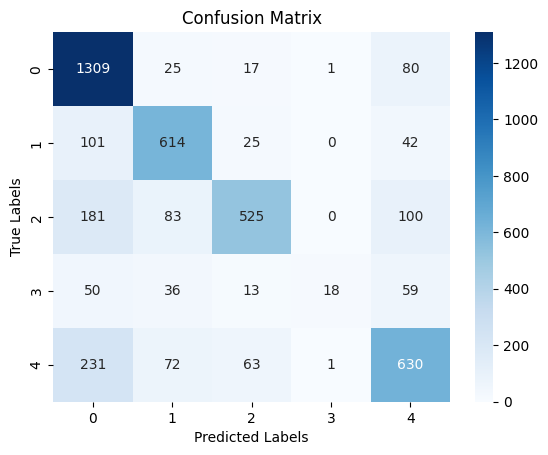

For: Bigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 415876

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.64      0.95      0.76      1432
           1       0.77      0.75      0.76       782
           2       0.84      0.51      0.64       889
           3       0.90      0.10      0.18       176
           4       0.73      0.58      0.65       997

    accuracy                           0.70      4276
   macro avg       0.77      0.58      0.60      4276
weighted avg       0.73      0.70      0.69      4276



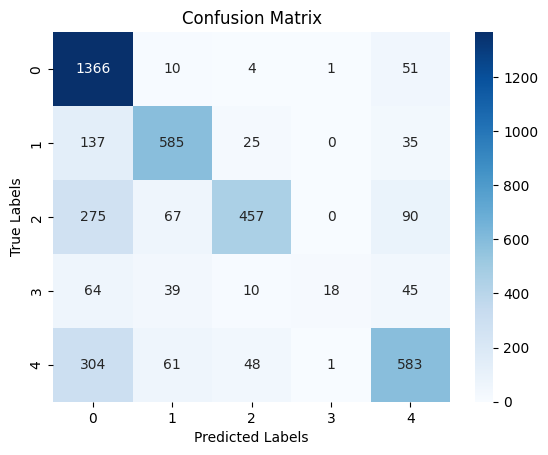

For: Trigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 951929

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.58      0.97      0.73      1432
           1       0.81      0.68      0.74       782
           2       0.84      0.46      0.59       889
           3       0.94      0.10      0.18       176
           4       0.72      0.54      0.62       997

    accuracy                           0.67      4276
   macro avg       0.78      0.55      0.57      4276
weighted avg       0.73      0.67      0.65      4276



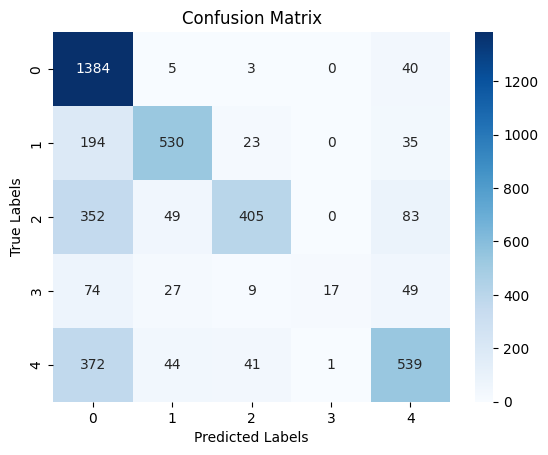

Running Logistic Regression
For: Unigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 55625

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1432
           1       0.92      0.81      0.86       782
           2       0.85      0.73      0.78       889
           3       0.91      0.49      0.64       176
           4       0.72      0.74      0.73       997

    accuracy                           0.80      4276
   macro avg       0.83      0.73      0.77      4276
weighted avg       0.81      0.80      0.79      4276



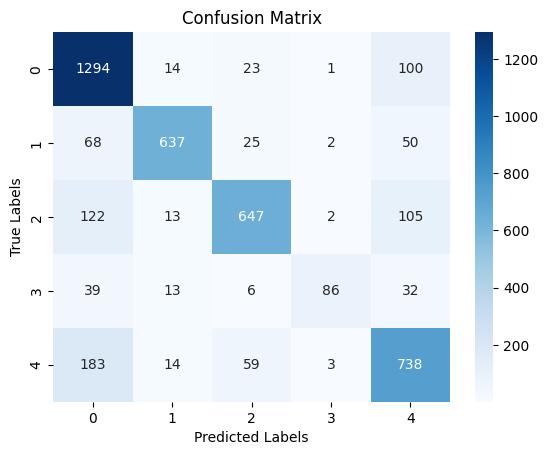

For: Bigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 415876

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.91      0.81      1432
           1       0.91      0.80      0.85       782
           2       0.86      0.69      0.76       889
           3       0.92      0.41      0.57       176
           4       0.71      0.73      0.72       997

    accuracy                           0.78      4276
   macro avg       0.83      0.71      0.74      4276
weighted avg       0.79      0.78      0.78      4276



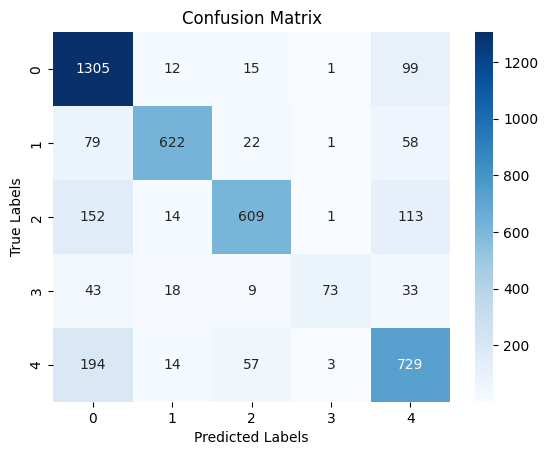

For: Trigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 951929

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.91      0.80      1432
           1       0.90      0.78      0.84       782
           2       0.85      0.65      0.74       889
           3       0.94      0.36      0.52       176
           4       0.69      0.71      0.70       997

    accuracy                           0.76      4276
   macro avg       0.82      0.68      0.72      4276
weighted avg       0.78      0.76      0.76      4276



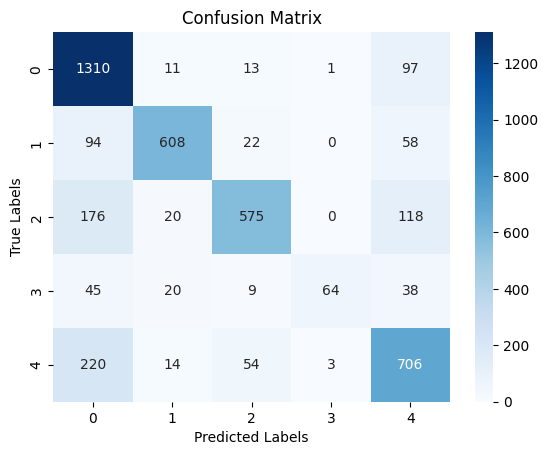

Running Random Forest
For: Unigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 55625

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      1432
           1       0.86      0.83      0.84       782
           2       0.84      0.64      0.73       889
           3       0.87      0.51      0.65       176
           4       0.70      0.67      0.68       997

    accuracy                           0.77      4276
   macro avg       0.80      0.71      0.74      4276
weighted avg       0.78      0.77      0.76      4276



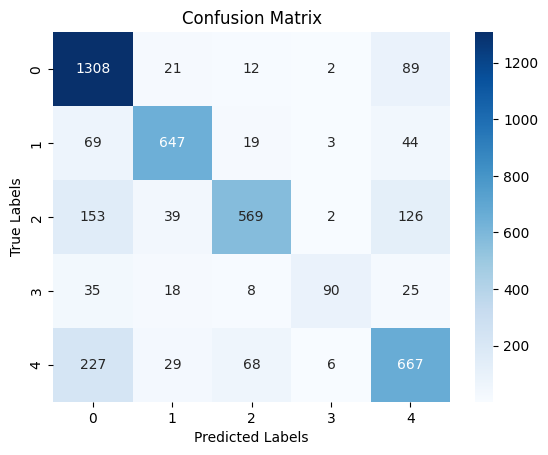

For: Bigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 415876

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.70      0.93      0.80      1432
           1       0.86      0.82      0.84       782
           2       0.85      0.61      0.71       889
           3       0.90      0.49      0.63       176
           4       0.72      0.65      0.68       997

    accuracy                           0.76      4276
   macro avg       0.81      0.70      0.73      4276
weighted avg       0.78      0.76      0.76      4276



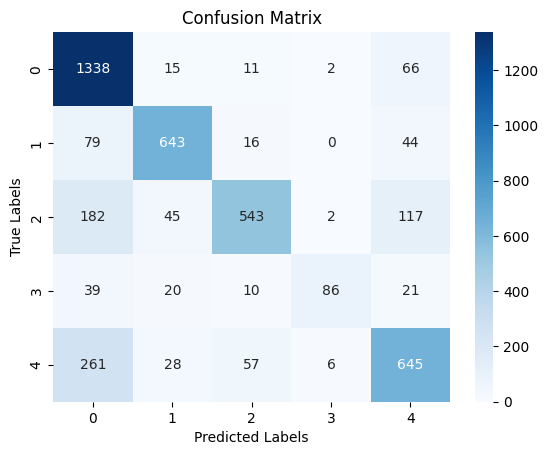

For: Trigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 951929

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.69      0.93      0.79      1432
           1       0.83      0.81      0.82       782
           2       0.87      0.60      0.71       889
           3       0.90      0.46      0.61       176
           4       0.72      0.65      0.68       997

    accuracy                           0.75      4276
   macro avg       0.80      0.69      0.72      4276
weighted avg       0.77      0.75      0.75      4276



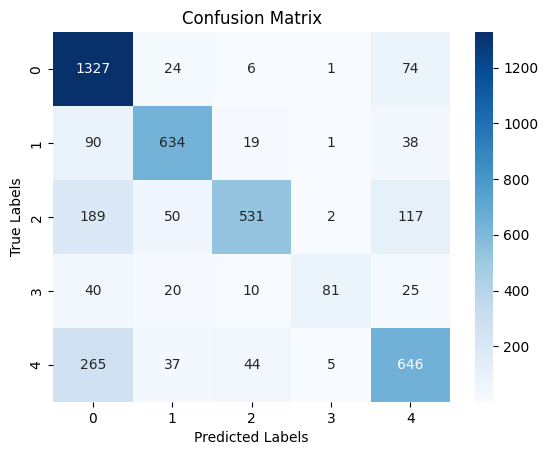

Running Support Vector Machines
For: Unigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 55625

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1432
           1       0.92      0.82      0.87       782
           2       0.86      0.74      0.79       889
           3       0.90      0.59      0.71       176
           4       0.73      0.74      0.74       997

    accuracy                           0.80      4276
   macro avg       0.83      0.76      0.79      4276
weighted avg       0.81      0.80      0.80      4276



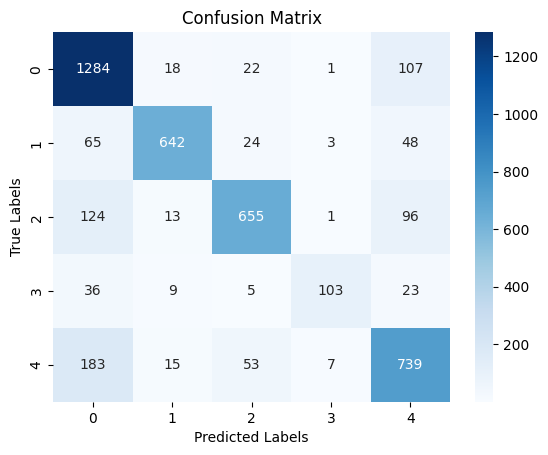

For: Bigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 415876

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.76      0.91      0.82      1432
           1       0.93      0.81      0.87       782
           2       0.85      0.71      0.78       889
           3       0.91      0.57      0.70       176
           4       0.72      0.74      0.73       997

    accuracy                           0.80      4276
   macro avg       0.83      0.75      0.78      4276
weighted avg       0.81      0.80      0.79      4276



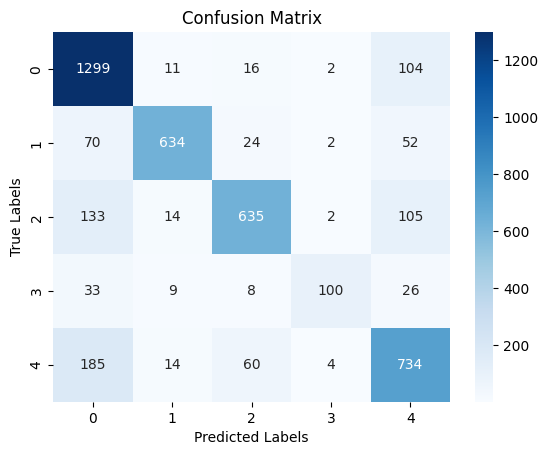

For: Trigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 951929

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1432
           1       0.93      0.80      0.86       782
           2       0.86      0.69      0.76       889
           3       0.91      0.53      0.67       176
           4       0.70      0.73      0.71       997

    accuracy                           0.78      4276
   macro avg       0.83      0.73      0.76      4276
weighted avg       0.80      0.78      0.78      4276



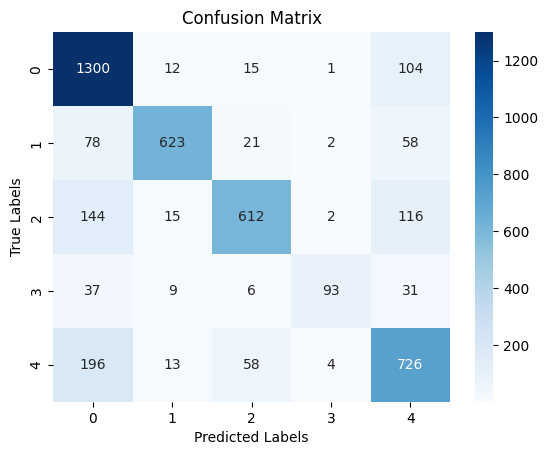

Running Cat Boost
For: Unigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 55625

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Learning rate set to 0.5
0:	learn: 1.2328259	total: 5.06s	remaining: 8m 20s
1:	learn: 1.1328483	total: 7.61s	remaining: 6m 12s
2:	learn: 1.0855549	total: 10.1s	remaining: 5m 26s
3:	learn: 1.0330552	total: 12.6s	remaining: 5m 1s
4:	learn: 1.0052115	total: 15.6s	remaining: 4m 56s
5:	learn: 0.9783115	total: 18.7s	remaining: 4m 53s
6:	learn: 0.9592051	total: 21.2s	remaining: 4m 41s
7:	learn: 0.9442729	total: 23.7s	remaining: 4m 32s
8:	learn: 0.9318155	total: 26.2s	remaining: 4m 24s
9:	learn: 0.9157596	total: 29.9s	remaining: 4m 29s
10:	learn: 0.9041713	total: 32.4s	remaining: 4m 21s
11:	learn: 0.8915167	total: 34.8s	remaining: 4m 15s
12:	learn: 0.8808614	total: 37.3s	remaining: 4m 9s
13:	learn: 0.8718459	total: 39.8s	remaining: 4m 4s
14:	learn: 0.8622891	total: 43.5s	remaining: 4m 6s
15:	learn: 0.8546935	total: 45.9s	remaining: 4m 1s
16:	learn: 0.8462530	t

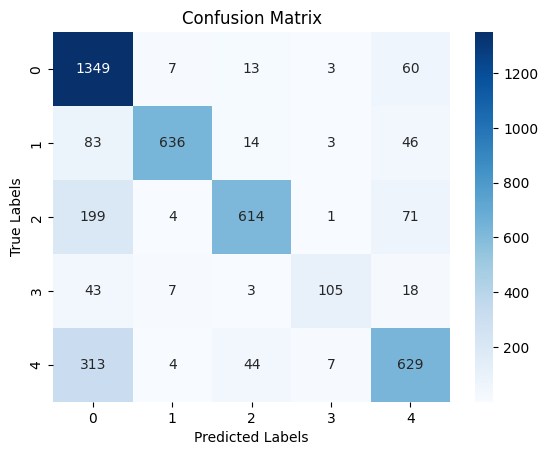

For: Bigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 415876

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Learning rate set to 0.5
0:	learn: 1.2560969	total: 10.7s	remaining: 17m 38s
1:	learn: 1.1563967	total: 17.1s	remaining: 13m 56s
2:	learn: 1.1015175	total: 23.3s	remaining: 12m 33s
3:	learn: 1.0523843	total: 29.5s	remaining: 11m 47s
4:	learn: 1.0170518	total: 35.8s	remaining: 11m 20s
5:	learn: 0.9909151	total: 41.8s	remaining: 10m 54s
6:	learn: 0.9763318	total: 48.3s	remaining: 10m 41s
7:	learn: 0.9607031	total: 53.9s	remaining: 10m 19s
8:	learn: 0.9429889	total: 1m	remaining: 10m 13s
9:	learn: 0.9257829	total: 1m 6s	remaining: 9m 57s
10:	learn: 0.9152213	total: 1m 13s	remaining: 9m 52s
11:	learn: 0.9017712	total: 1m 18s	remaining: 9m 37s
12:	learn: 0.8920320	total: 1m 25s	remaining: 9m 33s
13:	learn: 0.8754647	total: 1m 31s	remaining: 9m 21s
14:	learn: 0.8663307	total: 1m 38s	remaining: 9m 17s
15:	learn: 0.8578642	total: 1m 43s	remaining: 9m 5s
16:	l

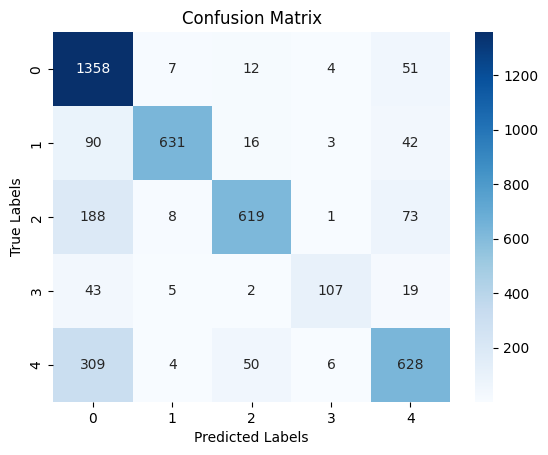

For: Trigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 951929

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Learning rate set to 0.5
0:	learn: 1.2475904	total: 16.1s	remaining: 26m 29s
1:	learn: 1.1475259	total: 27.1s	remaining: 22m 5s
2:	learn: 1.0906587	total: 38.2s	remaining: 20m 35s
3:	learn: 1.0498900	total: 49.3s	remaining: 19m 42s
4:	learn: 1.0205134	total: 1m	remaining: 19m 4s
5:	learn: 0.9905747	total: 1m 9s	remaining: 18m 16s
6:	learn: 0.9684904	total: 1m 20s	remaining: 17m 52s
7:	learn: 0.9543063	total: 1m 31s	remaining: 17m 32s
8:	learn: 0.9379958	total: 1m 42s	remaining: 17m 14s
9:	learn: 0.9240354	total: 1m 53s	remaining: 16m 59s
10:	learn: 0.9114258	total: 2m 4s	remaining: 16m 43s
11:	learn: 0.8970939	total: 2m 13s	remaining: 16m 21s
12:	learn: 0.8868048	total: 2m 24s	remaining: 16m 8s
13:	learn: 0.8761415	total: 2m 35s	remaining: 15m 56s
14:	learn: 0.8654957	total: 2m 46s	remaining: 15m 43s
15:	learn: 0.8567037	total: 2m 57s	remaining: 15m 3

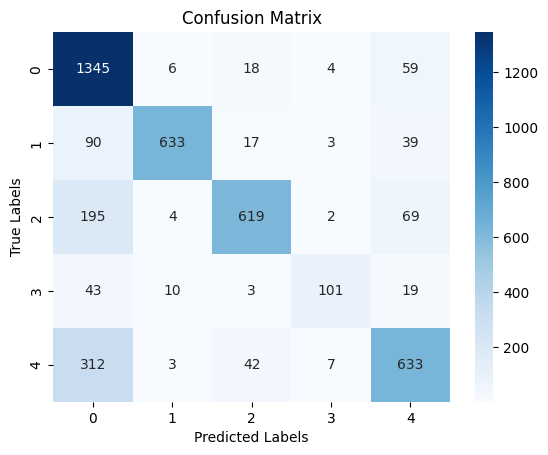

Running xg boost
For: Unigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 55625

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: xg boost
              precision    recall  f1-score   support

           0       0.70      0.95      0.81      1432
           1       0.96      0.84      0.90       782
           2       0.92      0.70      0.79       889
           3       0.87      0.62      0.72       176
           4       0.78      0.67      0.72       997

    accuracy                           0.80      4276
   macro avg       0.85      0.76      0.79      4276
weighted avg       0.82      0.80      0.80      4276



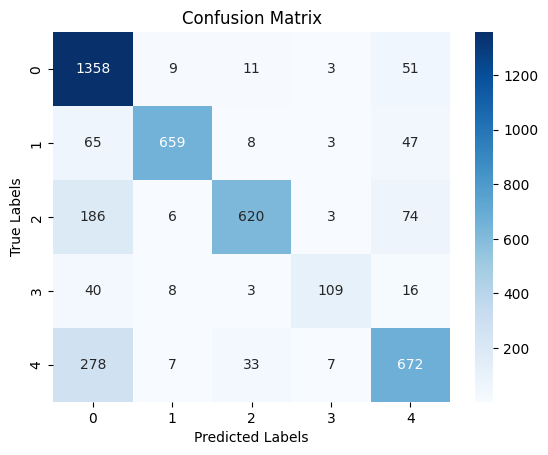

For: Bigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 415876

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: xg boost
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      1432
           1       0.96      0.84      0.89       782
           2       0.92      0.71      0.80       889
           3       0.89      0.62      0.73       176
           4       0.78      0.67      0.72       997

    accuracy                           0.80      4276
   macro avg       0.85      0.76      0.79      4276
weighted avg       0.82      0.80      0.80      4276



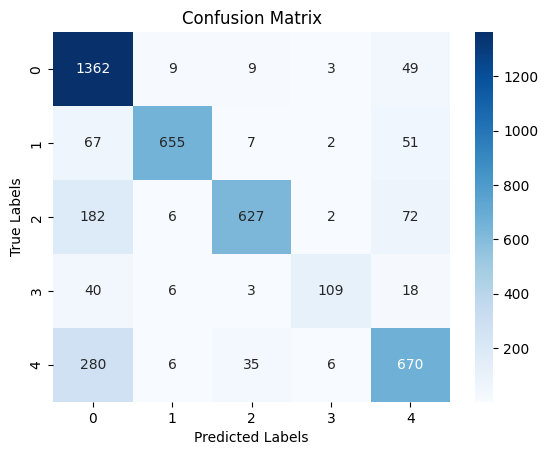

For: Trigram


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 951929

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42754 
	Training		 38478 
	Test			 4276
Classification Report: xg boost
              precision    recall  f1-score   support

           0       0.70      0.95      0.81      1432
           1       0.95      0.84      0.89       782
           2       0.92      0.70      0.80       889
           3       0.89      0.61      0.72       176
           4       0.77      0.66      0.71       997

    accuracy                           0.80      4276
   macro avg       0.85      0.75      0.79      4276
weighted avg       0.82      0.80      0.80      4276



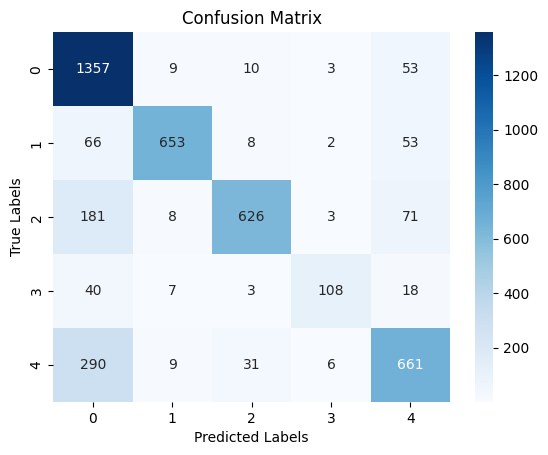

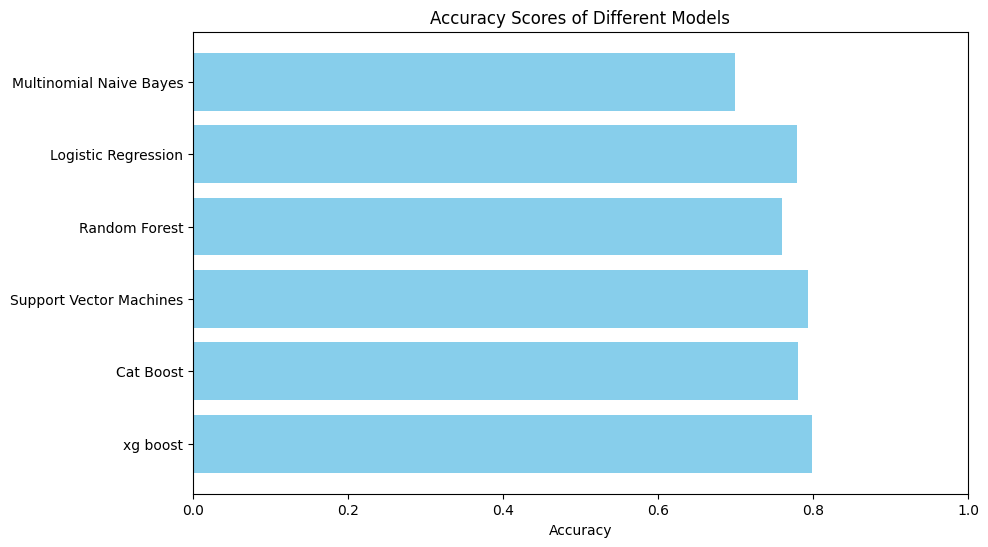

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracy_scores(accuracy_scores, model_names):
    plt.figure(figsize=(10, 6))
    plt.barh(model_names, accuracy_scores, color='skyblue')
    plt.xlabel('Accuracy')
    plt.title('Accuracy Scores of Different Models')
    plt.xlim(0, 1.0)  # Set the x-axis limit to ensure consistency
    plt.gca().invert_yaxis()  # Invert the y-axis for better readability
    plt.show()

# Modify the run_model function to return accuracy scores
def run_model(m, n):
    gram_names = ['Unigram', 'Bigram', 'Trigram']
    ngrams = [(1, 1), (1, 2), (1, 3)]
    counter = 0
    accuracy_scores = []

    for i, gram in enumerate(ngrams):
        print('For:', gram_names[counter])
        counter += 1
        tfidf, feature = calc_gram_tfidf(dataset.cleaned, gram)
        labels = label_encoding(dataset.label, False)
        X_train, X_test, y_train, y_test = dataset_split(feature, labels)
        model = m
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        print("Classification Report:", n)
        print(classification_report(y_test, y_pred))
        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()

    return accuracy_scores

# Define the models and their names
models = [
    MultinomialNB(),
    LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial'),
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC(kernel='linear'),
    CatBoostClassifier(iterations=100, random_seed=42),
    xgb.XGBClassifier(n_estimators=100, random_state=42),
]

model_names = [
    'Multinomial Naive Bayes',
    'Logistic Regression',
    'Random Forest',
    'Support Vector Machines',
    'Cat Boost',
    'xg boost',
]

# Run the models and get accuracy scores
accuracy_scores = []
for model, name in zip(models, model_names):
    print(f"Running {name}")
    scores = run_model(model, name)
    accuracy_scores.append(np.mean(scores))

# Plot the accuracy scores
plot_accuracy_scores(accuracy_scores, model_names)
